In [1]:
import spaco
import anndata
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns

### 00.squidpy

In [2]:
import squidpy as sq
import anndata
import numpy as np

### 01.seqFish

In [25]:
# load the pre-processed dataset
adata_cellbin_bkp = sq.datasets.seqfish()

adata_cellbin = adata_cellbin_bkp.copy()

adata_cellbin.obs['annotation'] = adata_cellbin.obs['celltype_mapped_refined'].copy()
adata_cellbin.obs['annotation'] = adata_cellbin.obs['annotation'].astype(str).astype('category')

min_cells=10
unique_tmp = np.unique(adata_cellbin.obs['annotation'],return_counts=True)
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation'].isin(unique_tmp[0][unique_tmp[1]>min_cells])].copy()

adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation']!="Unannotated"].copy()

adata_cellbin.write("./data/seqFish.h5ad")

In [26]:
adata_cellbin = anndata.read_h5ad("./data/seqFish.h5ad")

adata_cellbin

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined', 'annotation'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

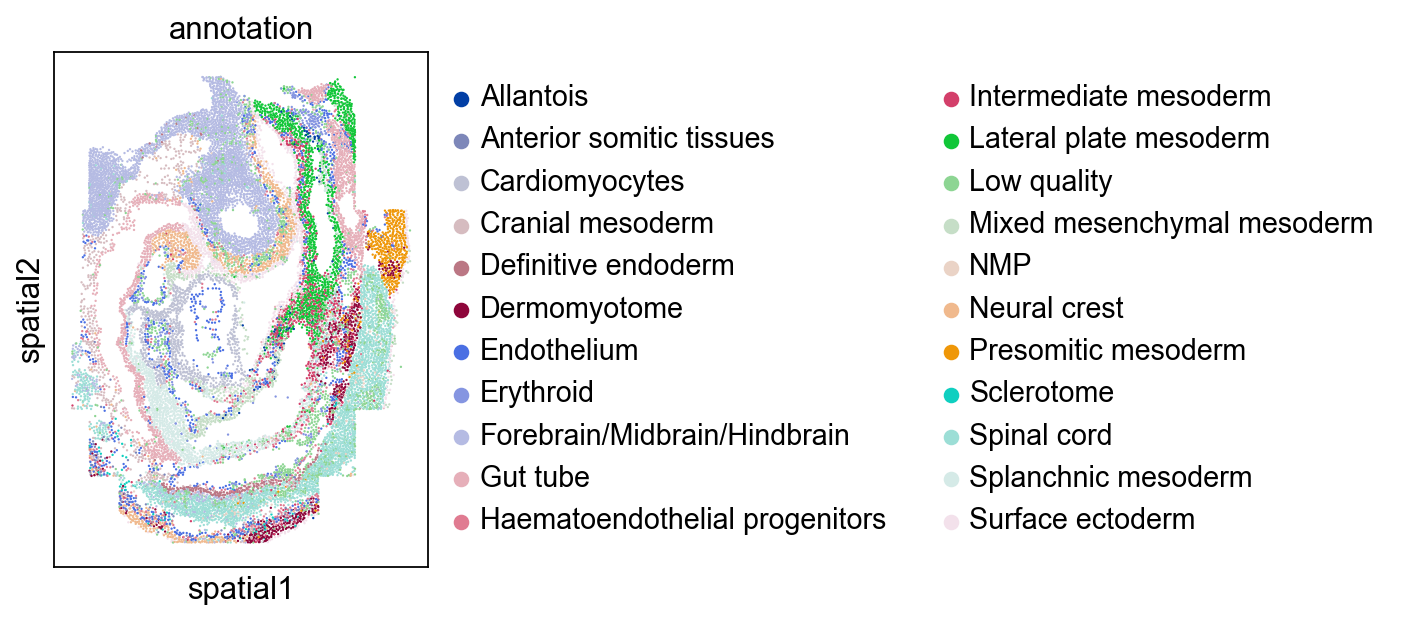

In [27]:
# default palette
sc.set_figure_params(figsize=(3,6), facecolor="white", dpi_save=300)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, save="FigureS3A_embryo_scanpy_default.pdf")
palette_default = adata_cellbin.uns['annotation_colors'].copy()

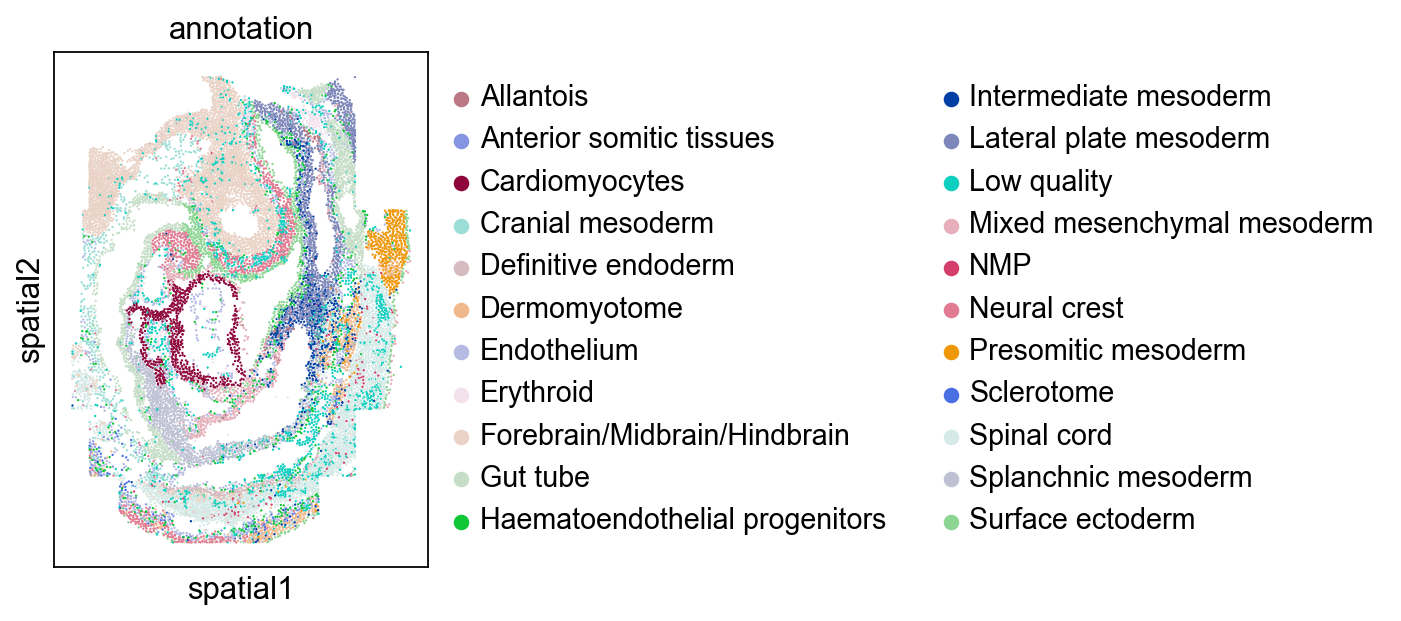

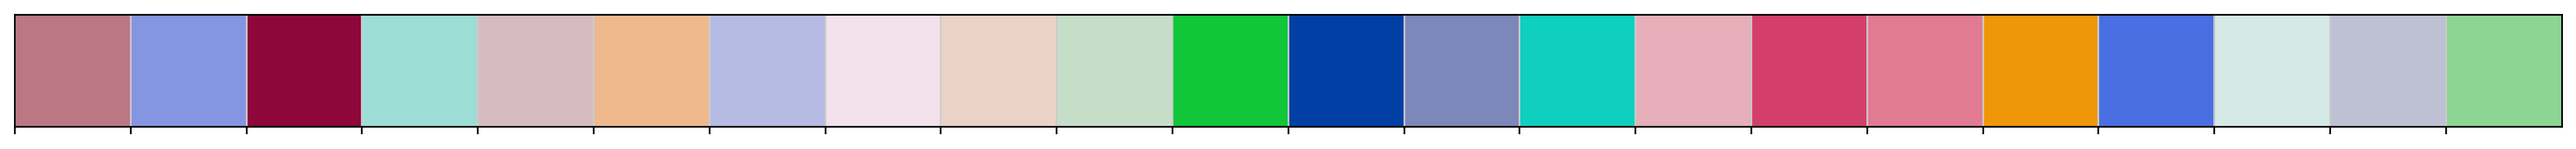

In [28]:
# Random palette
palette_random = palette_default.copy()
np.random.seed(123)
np.random.shuffle(palette_random)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_random, save="FigureS3A_embryo_scanpy_random.pdf")
sns.palplot(palette_random)

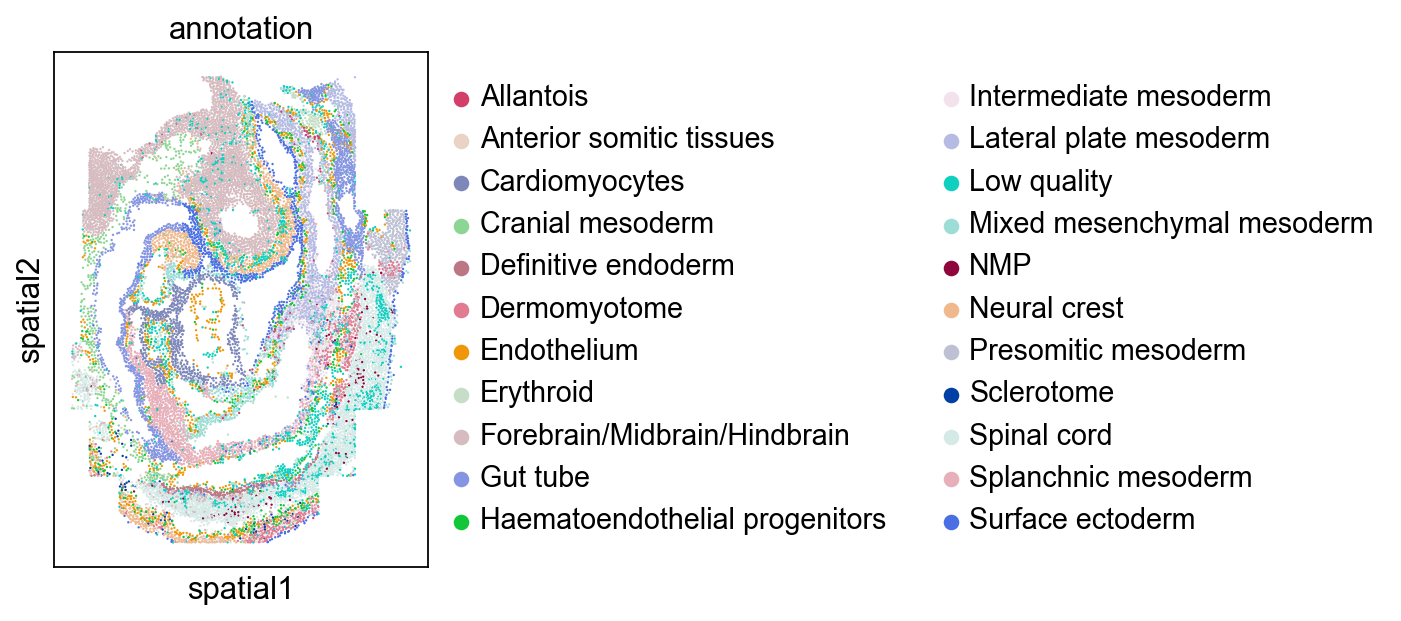

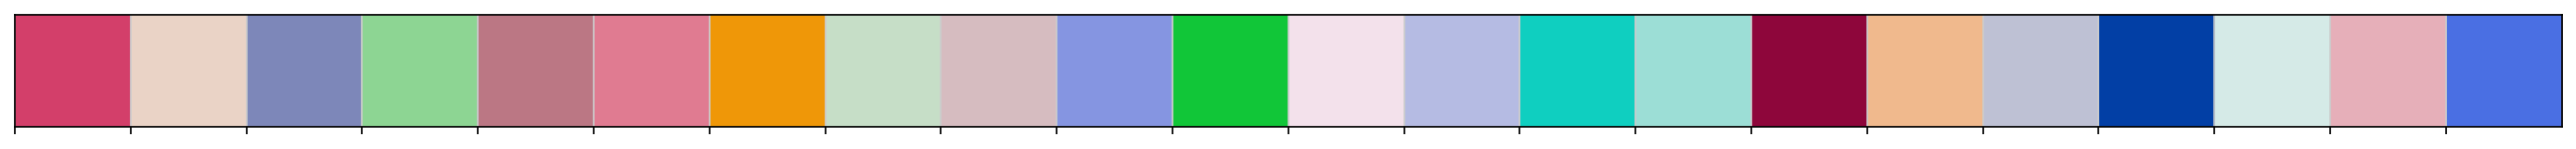

In [7]:
import os
os.environ['R_HOME'] = '/home/jingzh/.conda/envs/spaco_dev/lib/R'

from rpy2.robjects.packages import importr
from rpy2 import robjects
palo = importr("Palo")
base = importr("base")
r = robjects.r
set_seed = r('set.seed')
set_seed(int(123))

r_coor = robjects.r.matrix(
    robjects.FloatVector(adata_cellbin.obsm['spatial'].ravel()),
    nrow=len(adata_cellbin),
    byrow=True
)

try:
    palopal = palo.Palo(r_coor,adata_cellbin.obs['annotation'].to_list(),robjects.StrVector(palette_default))
    palo_mapping = dict(zip(list(base.names(palopal)), pd.DataFrame(palopal)[0].to_list()))
    palette_palo = [palo_mapping[i] for i in sorted(palo_mapping.keys())]
except:
    palette_palo = palette_default.copy()

sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_palo, save="FigureS3A_embryo_palo.pdf")
sns.palplot(palette_palo)


|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


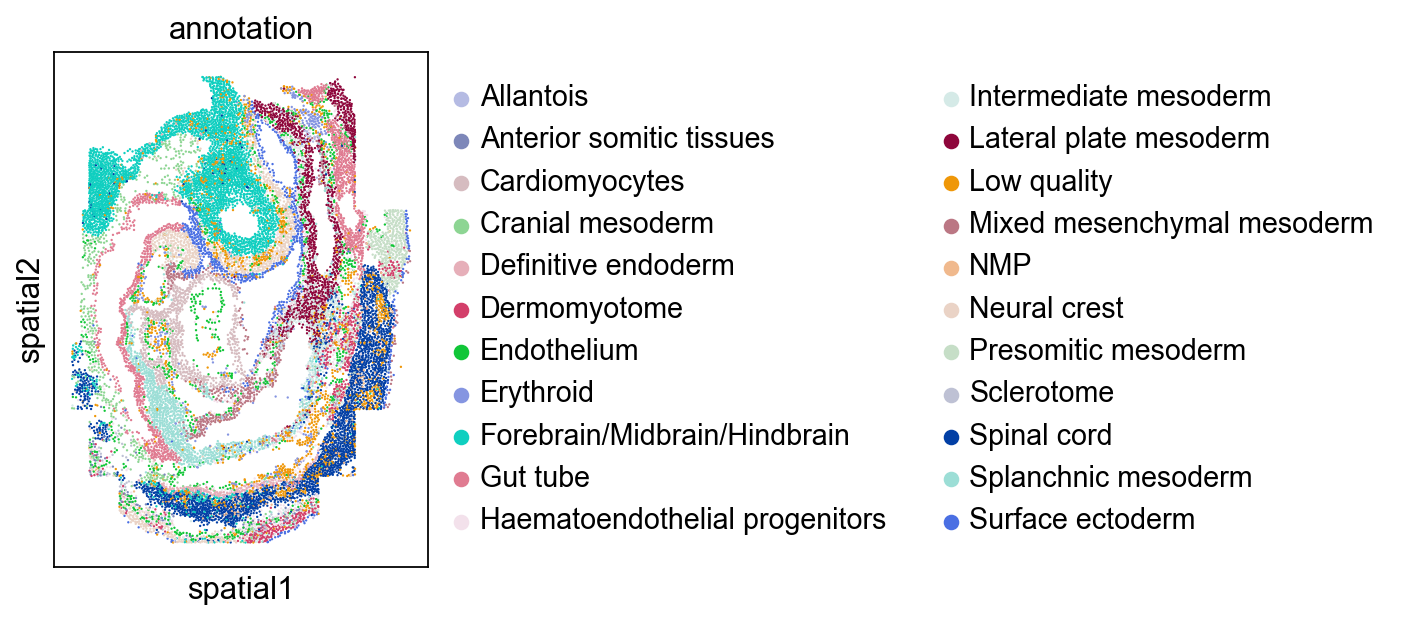

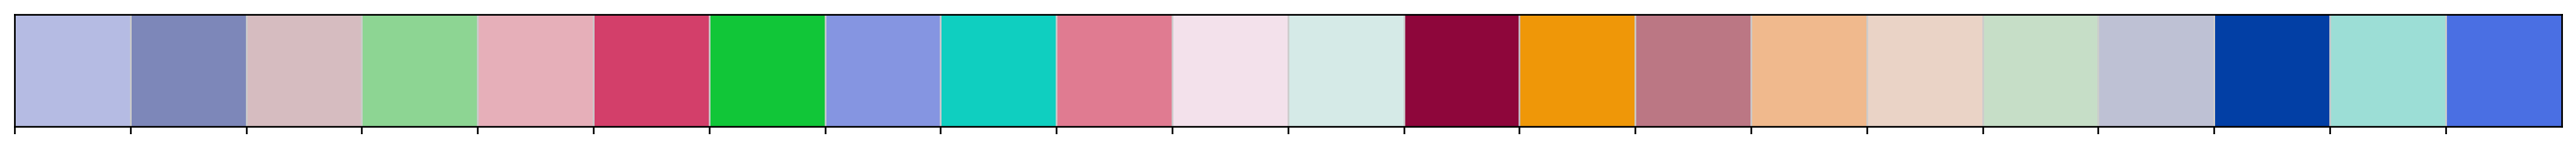

In [29]:
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=0.05,
    n_neighbors=30,
    palette=palette_default,
)
#color_mapping

color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_spaco, save="FigureS3A_embryo_spaco.pdf")
sns.palplot(palette_spaco)

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


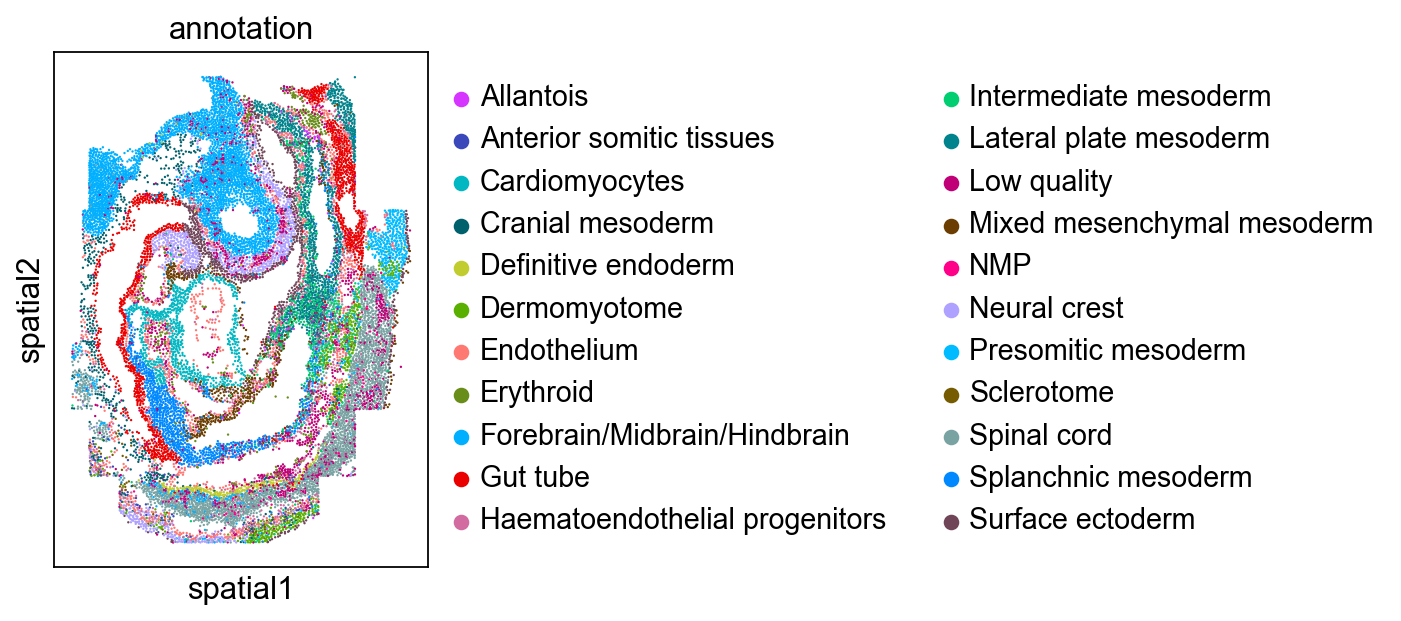

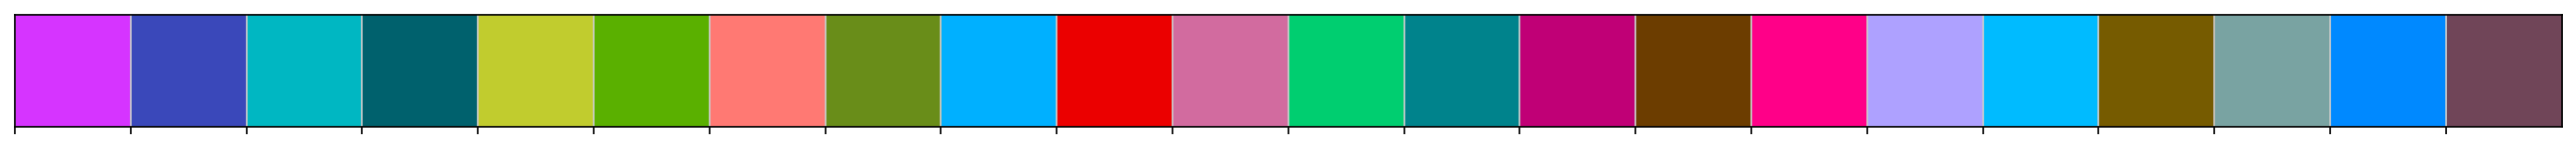

In [9]:
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=0.3,
    n_neighbors=30,
)
#color_mapping

color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_umap = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_umap, save="FigureS3A_embryo_umap.pdf")
sns.palplot(palette_umap)

In [10]:
adata_cellbin.obsm['spatial'].min(axis=0), adata_cellbin.obsm['spatial'].max(axis=0)

(array([-2.54936824, -3.49208423]), array([2.52029371, 3.49208423]))

### 02.imc

In [11]:
# load the pre-processed dataset
adata_cellbin_bkp = sq.datasets.imc()

adata_cellbin = adata_cellbin_bkp.copy()

adata_cellbin.obs['annotation'] = adata_cellbin.obs['cell type'].copy()
adata_cellbin.obs['annotation'] = adata_cellbin.obs['annotation'].astype(str).astype('category')

min_cells=10
unique_tmp = np.unique(adata_cellbin.obs['annotation'],return_counts=True)
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation'].isin(unique_tmp[0][unique_tmp[1]>min_cells])].copy()

adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation']!="Unannotated"].copy()

adata_cellbin.write("./data/imc.h5ad")

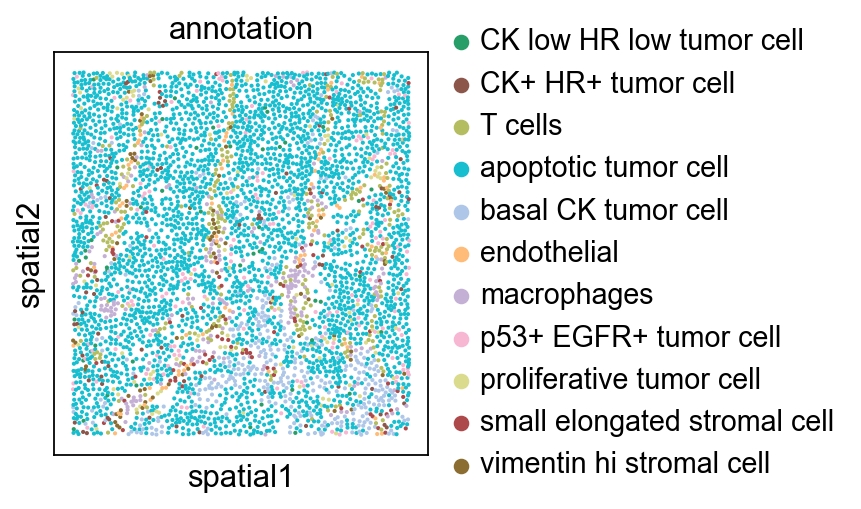

In [12]:
# default palette
sc.set_figure_params(figsize=(3,6), facecolor="white", dpi_save=300)
adata_cellbin.uns['annotation_colors'] = adata_cellbin.uns['cell type_colors'].copy()
palette_default = adata_cellbin.uns['annotation_colors'].tolist()
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, palette=palette_default, save="FigureS3B_IMC_tutorial.pdf")
palette_default = adata_cellbin.uns['annotation_colors']

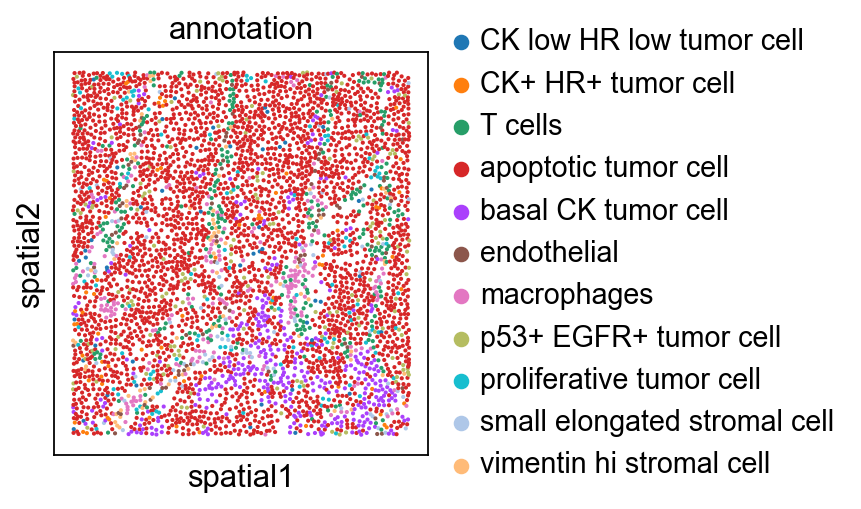

In [13]:
# default palette
sc.set_figure_params(figsize=(3,6), facecolor="white", dpi_save=300)
del adata_cellbin.uns['annotation_colors']
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, save="FigureS3B_IMC_default.pdf")
palette_default_mpl = adata_cellbin.uns['annotation_colors']

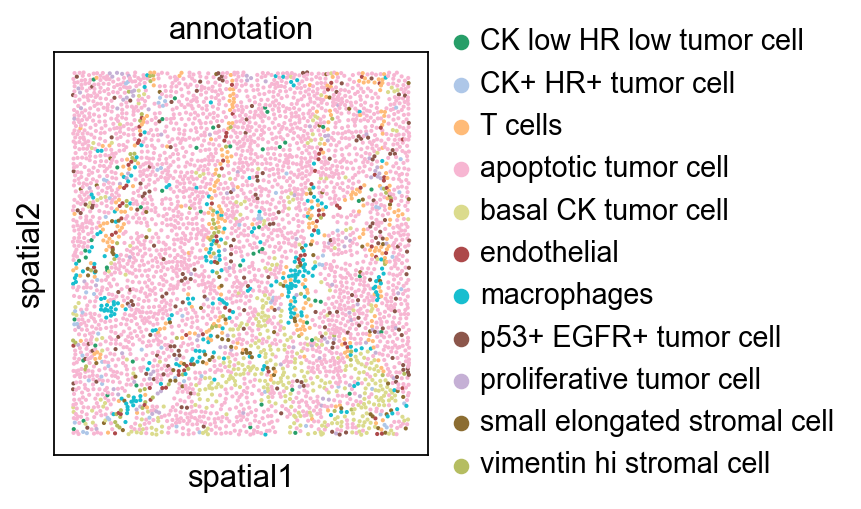

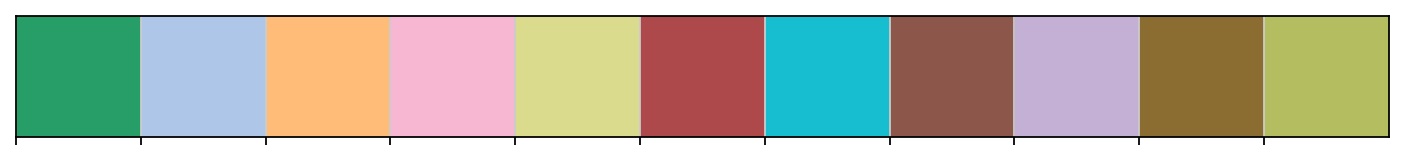

In [14]:
# Random palette
palette_random = palette_default.copy()
np.random.seed(123)
np.random.shuffle(palette_random)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, palette=palette_random, save="FigureS3B_IMC_random.pdf")
sns.palplot(palette_random)

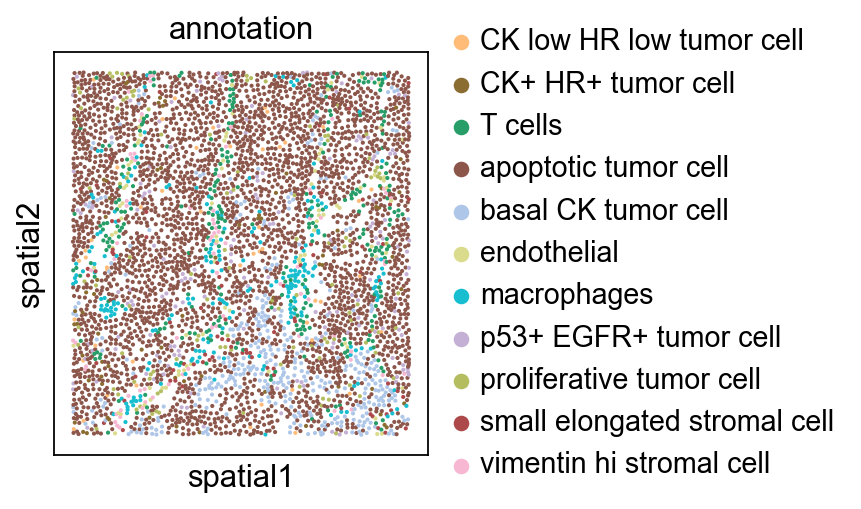

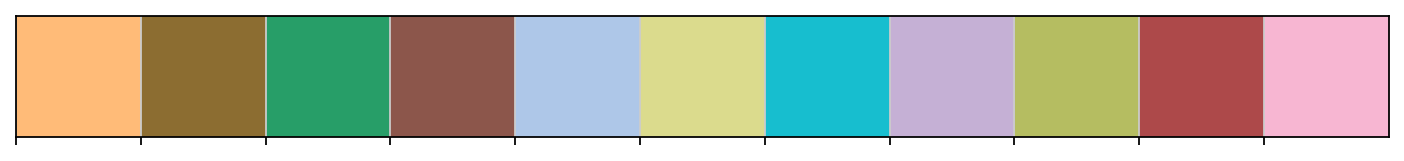

In [15]:
import os
os.environ['R_HOME'] = '/home/jingzh/.conda/envs/spaco_dev/lib/R'

from rpy2.robjects.packages import importr
from rpy2 import robjects
palo = importr("Palo")
base = importr("base")
r = robjects.r
set_seed = r('set.seed')
set_seed(int(123))

r_coor = robjects.r.matrix(
    robjects.FloatVector(adata_cellbin.obsm['spatial'].ravel()),
    nrow=len(adata_cellbin),
    byrow=True
)

try:
    palopal = palo.Palo(r_coor,adata_cellbin.obs['annotation'].to_list(),robjects.StrVector(palette_default))
    palo_mapping = dict(zip(list(base.names(palopal)), pd.DataFrame(palopal)[0].to_list()))
    palette_palo = [palo_mapping[i] for i in sorted(palo_mapping.keys())]
except:
    palette_palo = palette_default.copy()

sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, palette=palette_palo, save="FigureS3B_IMC_palo.pdf")
sns.palplot(palette_palo)

In [16]:
adata_cellbin.obsm['spatial'].min(axis=0), adata_cellbin.obsm['spatial'].max(axis=0)

(array([0.76470588, 1.10526316]), array([731.17391304, 788.17647059]))

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


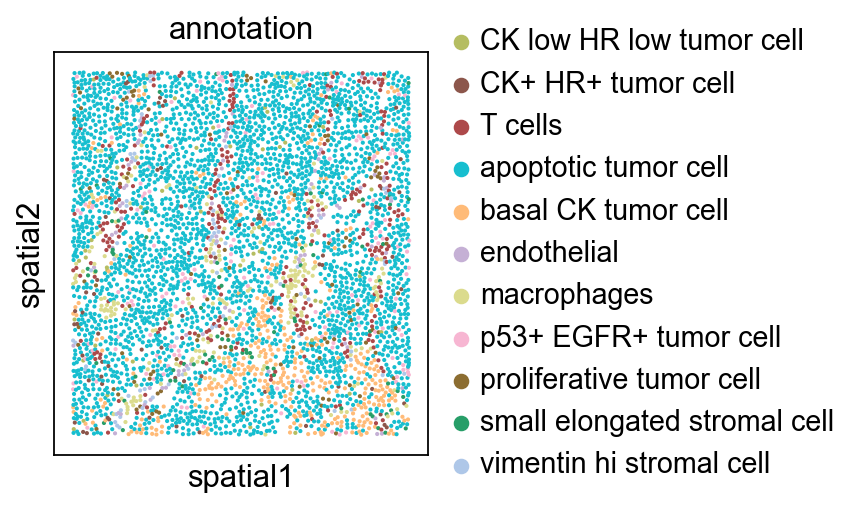

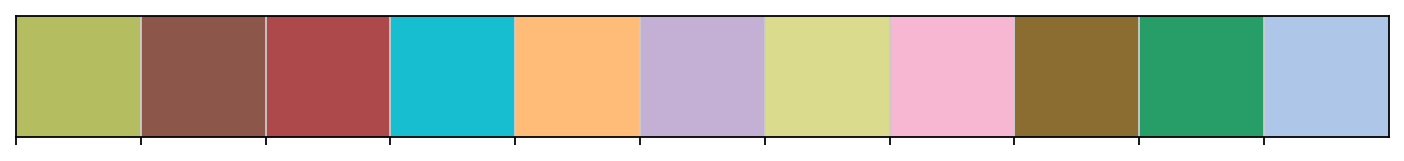

In [20]:
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    palette=palette_default,
    radius=70,
    n_neighbors=60
)
#color_mapping

color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, palette=palette_spaco, save="FigureS3B_IMC_spaco.pdf")
sns.palplot(palette_spaco)

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


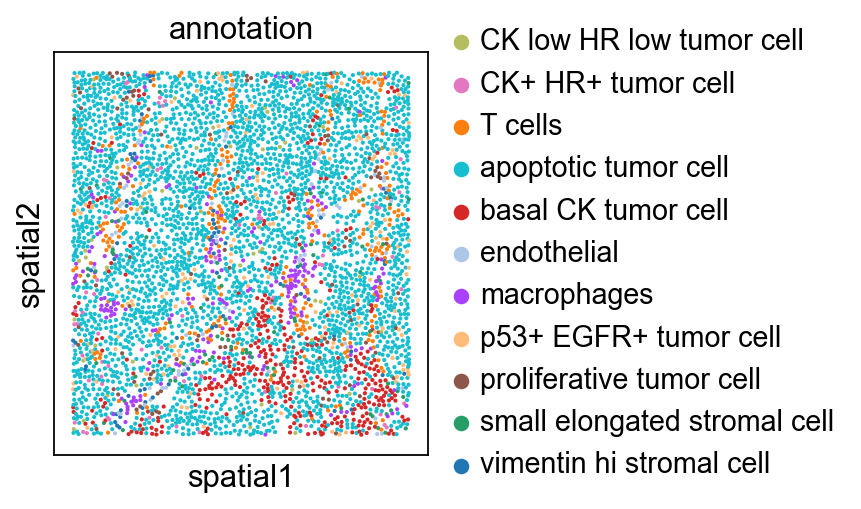

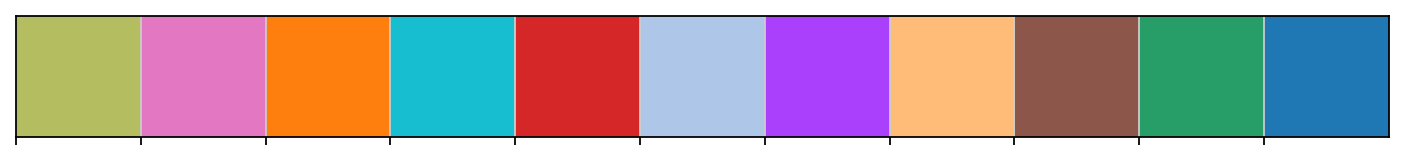

In [21]:
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    palette=palette_default_mpl,
    radius=70,
    n_neighbors=60
)
#color_mapping

color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, palette=palette_spaco, save="FigureS3B_IMC_spaco_mpl.pdf")
sns.palplot(palette_spaco)

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


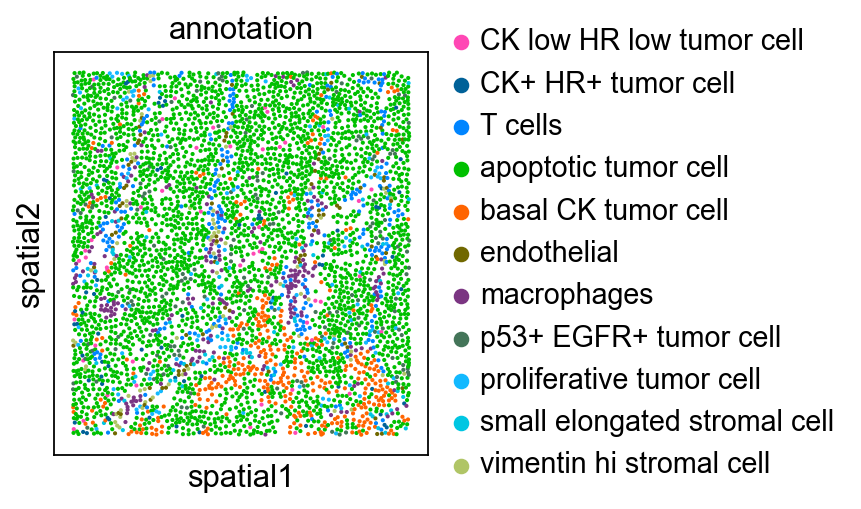

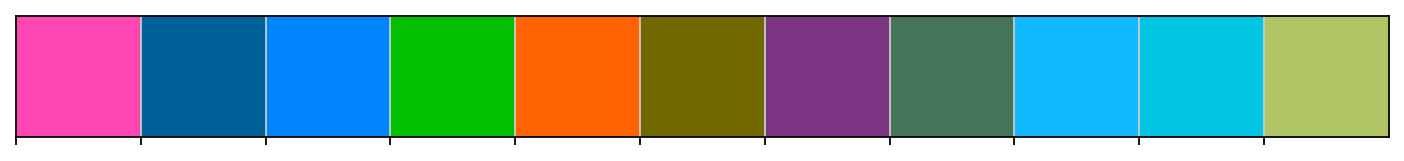

In [23]:
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=35,
    n_neighbors=50,
    neighbor_kwargs={"n_cells":0},  
)
#color_mapping

color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_umap = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=9, palette=palette_umap, save="FigureS3B_IMC_umap.pdf")
sns.palplot(palette_umap)

In [37]:
import session_info

session_info.show(excludes=['base','Palo'])